# 神经网络剖析

## 层：深度学习的基础组件

In [1]:
from keras import layers

# 有32个输出单元的密集层
layers=layers.Dense(32,input_shape=(784,))

In [2]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(32,input_shape=(784,)))
model.add(layers.Dense(32))

## 模型：层构成的网络

## 损失函数与优化器：配置学习过程的关键

# Keras简介

## Keras、TensorFlow、Theano和CNTK

## 使用Keras开发：概述

In [3]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(32,activation='relu',input_shape=(784,)))
model.add(layers.Dense(10,activation='softmax'))

In [4]:
input_tensor=layers.Input(shape=(784,))
x=layers.Dense(32,activation='relu')(input_tensor)
output_tensor=layers.Dense(10,activation='softmax')(x)

model=models.Model(inputs=input_tensor,outputs=output_tensor)

In [5]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.01),
             loss='mse',
             metrics=['accuracy'])

In [6]:
# model.fit(input_tensor,target_tensor,batch_size=128,epochs=10)

# 建立深度学习工作站

## Jupyter笔记本：运行深度学习实验的首选方法

## 运行Keras：两种选择

## 在云端运行深度学习任务：优点和缺点

## 深度学习的最佳GPU

# 电影评论分类：二分类问题

## IMBD数据集

In [7]:
from keras.datasets import imdb

In [8]:
(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)

In [9]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [10]:
train_labels[0]

1

In [11]:
max([max(sequence) for sequence in train_data])

9999

In [12]:
# word_index是一个将单词映射为整数索引的字典
word_index=imdb.get_word_index()
# 键值颠倒，将整数索引映射为单词
reverse_word_index=dict([(value,key) for (key,value) in word_index.items()])
# 将评论解码。注意，索引减去了3，因为0、1、2是为“padding”（填充），“start of sequence”（序列开始）,“unknown”（未知值）分别保留的索引
decoded_review=' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])
decoded_review

# 帮助代码
# c='abcghidefjkl'
# new_c = list(c)
# cc =' '.join(new_c)
# print('2.通过空分隔符把new_c列表里面元素进行分隔,赋值给到cc:',cc)

# test_dict=dict({'one':1,'two':2})
# print(test_dict.get(-1))
# print(test_dict.get(-1,'?')) # ''?'用与填充该索引值
# print(test_dict.get(-2,'?'))

# 测试i-3的作用
# test_decode_review=' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])
# test_decode_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## 准备数据

In [13]:
import numpy as np

def vectorize_sequences(sequences,dimension=10000):
    # 创建一个形状为(len(sequences),dimension)的零矩阵
    results=np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        # 将result[i]的指定索引设为1
        results[i,sequence]=1.
    return results

# 将训练数据向量化
x_train=vectorize_sequences(train_data)
# 将测试数据向量化
x_test=vectorize_sequences(test_data)

# 帮助代码
# test=[[1,3],[0,3],[2,3],[1]]
# test_zeros=np.zeros((4,4))
# for i,sequence in enumerate(test):
#     test_zeros[i,sequence]=1.
# test_zeros

In [14]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [15]:
y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')

## 构建网路

In [16]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [17]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [18]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [19]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

## 验证你的方法

In [20]:
x_val=x_train[:10000]
partial_x_train=x_train[10000:]

y_val=y_train[:10000]
partial_y_train=y_train[10000:]

In [21]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

history=model.fit(partial_x_train,
                 partial_y_train,
                 epochs=20,
                 batch_size=512,
                 validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 4s 61ms/step - loss: 0.5169 - acc: 0.7943 - val_loss: 0.3955 - val_acc: 0.8664
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3156 - acc: 0.8969 - val_loss: 0.3112 - val_acc: 0.8876
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2313 - acc: 0.9251 - val_loss: 0.2817 - val_acc: 0.8927
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1809 - acc: 0.9421 - val_loss: 0.2742 - val_acc: 0.8917
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1477 - acc: 0.9523 - val_loss: 0.3062 - val_acc: 0.8758
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1225 - acc: 0.9629 - val_loss: 0.3086 - val_acc: 0.8827
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0987 - acc: 0.9724 - val_loss: 0.3042 - val_acc: 0.8848
Epoch 8/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0861 - a

limit_output extension: Maximum message size of 10000 exceeded with 10138 characters

In [22]:
history_dict=history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

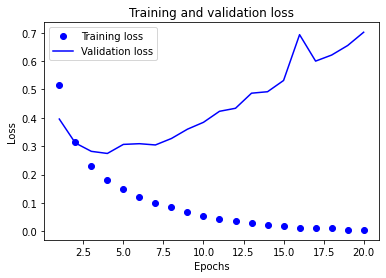

In [23]:
import matplotlib.pyplot as plt

history_dict=history.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']

epochs=range(1,len(loss_values)+1)

# 'bo'表示蓝色圆点
plt.plot(epochs,loss_values,'bo',label='Training loss')
# 'b'表示蓝色实线
plt.plot(epochs,val_loss_values,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

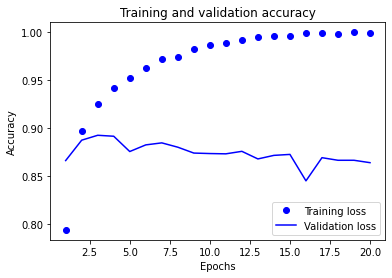

In [24]:
# 清空图像
plt.clf()
acc=history_dict['acc']
val_acc=history_dict['val_acc']

plt.plot(epochs,acc,'bo',label='Training loss')
plt.plot(epochs,val_acc,'b',label='Validation loss')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [25]:
model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

model.fit(x_train,y_train,epochs=4,batch_size=512)
results=model.evaluate(x_test,y_test)

Epoch 1/4
49/49 [==============================] - 1s 11ms/step - loss: 0.4398 - acc: 0.8263
Epoch 2/4
49/49 [==============================] - 1s 11ms/step - loss: 0.2538 - acc: 0.9112
Epoch 3/4
49/49 [==============================] - 1s 11ms/step - loss: 0.1994 - acc: 0.9290
Epoch 4/4
314/782 [===========>..................] - ETA: 1s - loss: 0.3055 - acc: 0.8787

limit_output extension: Maximum message size of 10000 exceeded with 10159 characters

In [26]:
results

[0.3011723756790161, 0.8817600011825562]

## 使用训练好的网络在新数据上生成预测结果

In [27]:
model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.2364483 ],
       [0.99937457],
       [0.9365042 ],
       ...,
       [0.15233292],
       [0.07355566],
       [0.73146605]], dtype=float32)

## 进一步实验

In [28]:
from keras import models
from keras import layers
import numpy as np
from keras.datasets import imdb

(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)

def vectorize_sequences(sequences,dimension=10000):
    # 创建一个形状为(len(sequences),dimension)的零矩阵
    results=np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        # 将result[i]的指定索引设为1
        results[i,sequence]=1.
    return results

# 将训练数据向量化
x_train=vectorize_sequences(train_data)
# 将测试数据向量化
x_test=vectorize_sequences(test_data)

y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')

model=models.Sequential()
model.add(layers.Dense(64,activation='tanh',input_shape=(10000,)))
model.add(layers.Dense(32,activation='tanh'))
model.add(layers.Dense(16,activation='tanh'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='mse',metrics=['acc'])
model.fit(x_train,y_train,epochs=4,batch_size=512)
results=model.evaluate(x_test,y_test)

Epoch 1/4
49/49 [==============================] - 1s 11ms/step - loss: 0.1329 - acc: 0.8086
Epoch 2/4
49/49 [==============================] - 1s 11ms/step - loss: 0.0685 - acc: 0.9095
Epoch 3/4
49/49 [==============================] - 1s 11ms/step - loss: 0.0526 - acc: 0.9328
Epoch 4/4
309/782 [==========>...................] - ETA: 1s - loss: 0.1043 - acc: 0.864

limit_output extension: Maximum message size of 10000 exceeded with 10004 characters

In [29]:
results

[0.10290373116731644, 0.8661999702453613]

## 小结

# 新闻分类：多分类问题

## 路透社数据

In [30]:
from keras.datasets import reuters

(train_data,train_labels),(test_data,test_labels)=reuters.load_data(num_words=10000)

In [31]:
len(train_data)

8982

In [32]:
len(test_data)

2246

In [33]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [34]:
word_index=reuters.get_word_index()
reverse_word_index=dict([(value,key) for (key,value) in word_index.items()])
# 注意，索引减去了3，因为0、1、2是为“padding”（填充），“start of ”（序列开始），“unknown”（未知词）分别保留的索引
decoded_newsize=' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])
decoded_newsize

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [35]:
train_labels[10]

3

## 准备数据

In [36]:
import numpy as np

def vectorize_sequences(sequences,dimension=10000):
    results=np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence]=1.
    return results

# 将训练数据向量化
x_train=vectorize_sequences(train_data)
# 将测试标签向量化
x_test=vectorize_sequences(test_data)

In [37]:
def to_one_hot(labels,dimension=46):
    results=np.zeros((len(labels),dimension))
    for i,label in enumerate(labels):
        results[i,label]=1.
    return results

# 将训练标签向量化
one_hot_train_labels=to_one_hot(train_labels)
# 将测试标签向量化
one_hot_test_labels=to_one_hot(test_labels)

In [38]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels=to_categorical(train_labels)
one_hot_test_labels=to_categorical(test_labels)

## 构建网络

In [39]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

In [40]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

## 验证你的方法

In [41]:
x_val=x_train[:1000]
partial_x_train=x_train[1000:]

y_val=one_hot_train_labels[:1000]
partial_y_train=one_hot_train_labels[1000:]

In [42]:
history=model.fit(partial_x_train,
                 partial_y_train,
                 epochs=20,
                 batch_size=512,
                 validation_data=(x_val,y_val))

Epoch 1/20
16/16 [==============================] - 1s 31ms/step - loss: 2.5930 - accuracy: 0.4905 - val_loss: 1.7143 - val_accuracy: 0.6390
Epoch 2/20
16/16 [==============================] - 0s 14ms/step - loss: 1.3930 - accuracy: 0.7078 - val_loss: 1.2839 - val_accuracy: 0.7090
Epoch 3/20
16/16 [==============================] - 0s 14ms/step - loss: 1.0286 - accuracy: 0.7710 - val_loss: 1.1041 - val_accuracy: 0.7560
Epoch 4/20
16/16 [==============================] - 0s 14ms/step - loss: 0.8127 - accuracy: 0.8232 - val_loss: 1.0144 - val_accuracy: 0.7800
Epoch 5/20
16/16 [==============================] - 0s 14ms/step - loss: 0.6416 - accuracy: 0.8654 - val_loss: 0.9405 - val_accuracy: 0.7950
Epoch 6/20
16/16 [==============================] - 0s 14ms/step - loss: 0.5146 - accuracy: 0.8915 - val_loss: 0.9164 - val_accuracy: 0.8180
Epoch 7/20
16/16 [==============================] - 0s 14ms/step - loss: 0.4153 - accuracy: 0.9137 - val_loss: 0.8739 - val_accuracy: 0.8230
Epoch 8/20
16

limit_output extension: Maximum message size of 10000 exceeded with 10052 characters

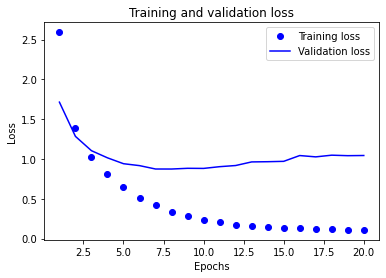

In [43]:
import matplotlib.pyplot as plt

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(loss_values)+1)

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

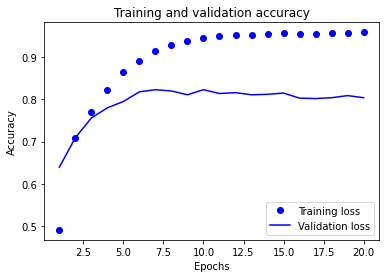

In [44]:
# 清空图像
plt.clf()

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

plt.plot(epochs,acc,'bo',label='Training loss')
plt.plot(epochs,val_acc,'b',label='Validation loss')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [45]:
model=models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

history=model.fit(partial_x_train,
                 partial_y_train,
                 epochs=20,
                 batch_size=512,
                 validation_data=(x_val,y_val))

results=model.evaluate(x_test,one_hot_test_labels)

Epoch 1/20
16/16 [==============================] - 1s 25ms/step - loss: 2.8245 - accuracy: 0.4987 - val_loss: 1.9081 - val_accuracy: 0.6480
Epoch 2/20
16/16 [==============================] - 0s 14ms/step - loss: 1.5192 - accuracy: 0.6942 - val_loss: 1.3368 - val_accuracy: 0.7170
Epoch 3/20
16/16 [==============================] - 0s 14ms/step - loss: 1.0815 - accuracy: 0.7770 - val_loss: 1.1432 - val_accuracy: 0.7430
Epoch 4/20
16/16 [==============================] - 0s 14ms/step - loss: 0.8419 - accuracy: 0.8242 - val_loss: 1.0410 - val_accuracy: 0.7720
Epoch 5/20
16/16 [==============================] - 0s 14ms/step - loss: 0.6726 - accuracy: 0.8628 - val_loss: 0.9645 - val_accuracy: 0.7980
Epoch 6/20
16/16 [==============================] - 0s 14ms/step - loss: 0.5399 - accuracy: 0.8911 - val_loss: 0.9100 - val_accuracy: 0.8000
Epoch 7/20
16/16 [==============================] - 0s 14ms/step - loss: 0.4353 - accuracy: 0.9131 - val_loss: 0.9037 - val_accuracy: 0.8010
Epoch 8/20
16

limit_output extension: Maximum message size of 10000 exceeded with 10052 characters

In [46]:
results

[1.1797524690628052, 0.7934104800224304]

In [47]:
import copy
test_labels_copy=copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hist_array=np.array(test_labels)==np.array(test_labels_copy)
float(np.sum(hist_array))/len(test_labels)

0.18788958147818344

## 在新数据上生成预测结果

In [48]:
prediction=model.predict(x_test)

71/71 [==============================] - 0s 2ms/step


In [49]:
prediction[0].shape

(46,)

In [50]:
np.sum(prediction[0])

1.0

In [51]:
np.argmax(prediction[0])

3

## 处理标签和损失的另一种方法

In [52]:
y_train=np.array(train_labels)
y_test=np.array(test_labels)

In [53]:
model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['acc'])

## 中间维度足够大的重要性

In [54]:
model=models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(4,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

history=model.fit(partial_x_train,
                 partial_y_train,
                 epochs=20,
                 batch_size=512,
                 validation_data=(x_val,y_val))

results=model.evaluate(x_test,one_hot_test_labels)

Epoch 1/20
16/16 [==============================] - 1s 24ms/step - loss: 3.2841 - accuracy: 0.2082 - val_loss: 2.8393 - val_accuracy: 0.2210
Epoch 2/20
16/16 [==============================] - 0s 15ms/step - loss: 2.5907 - accuracy: 0.2258 - val_loss: 2.3748 - val_accuracy: 0.2780
Epoch 3/20
16/16 [==============================] - 0s 14ms/step - loss: 2.1551 - accuracy: 0.4696 - val_loss: 2.0403 - val_accuracy: 0.5770
Epoch 4/20
16/16 [==============================] - 0s 14ms/step - loss: 1.8168 - accuracy: 0.6242 - val_loss: 1.7873 - val_accuracy: 0.6280
Epoch 5/20
16/16 [==============================] - 0s 15ms/step - loss: 1.5641 - accuracy: 0.6668 - val_loss: 1.6110 - val_accuracy: 0.6520
Epoch 6/20
16/16 [==============================] - 0s 14ms/step - loss: 1.3821 - accuracy: 0.6878 - val_loss: 1.5042 - val_accuracy: 0.6610
Epoch 7/20
16/16 [==============================] - 0s 20ms/step - loss: 1.2510 - accuracy: 0.7182 - val_loss: 1.4297 - val_accuracy: 0.6940
Epoch 8/20
16

limit_output extension: Maximum message size of 10000 exceeded with 10052 characters

In [55]:
results

[1.4755580425262451, 0.7025823593139648]

## 进一步的实验

In [56]:
model=models.Sequential()
model.add(layers.Dense(128,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

history=model.fit(partial_x_train,
                 partial_y_train,
                 epochs=9,
                 batch_size=512,
                 validation_data=(x_val,y_val))

results=model.evaluate(x_test,one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 26ms/step - loss: 2.6301 - accuracy: 0.4952 - val_loss: 1.6625 - val_accuracy: 0.6170
Epoch 2/9
16/16 [==============================] - 0s 14ms/step - loss: 1.3600 - accuracy: 0.7038 - val_loss: 1.2762 - val_accuracy: 0.7240
Epoch 3/9
16/16 [==============================] - 0s 14ms/step - loss: 0.9941 - accuracy: 0.7828 - val_loss: 1.1382 - val_accuracy: 0.7650
Epoch 4/9
16/16 [==============================] - 0s 15ms/step - loss: 0.7838 - accuracy: 0.8211 - val_loss: 1.1318 - val_accuracy: 0.7610
Epoch 5/9
16/16 [==============================] - 0s 15ms/step - loss: 0.5965 - accuracy: 0.8711 - val_loss: 1.0138 - val_accuracy: 0.7940
Epoch 6/9
16/16 [==============================] - 0s 16ms/step - loss: 0.4941 - accuracy: 0.8966 - val_loss: 0.9840 - val_accuracy: 0.8130
Epoch 7/9
16/16 [==============================] - 0s 15ms/step - loss: 0.3739 - accuracy: 0.9240 - val_loss: 1.0234 - val_accuracy: 0.7950
Epoch 8/9
16/16 [===

In [57]:
results

[1.1121329069137573, 0.7862867116928101]

## 小结

In [58]:
y_train

array([ 3,  4,  3, ..., 25,  3, 25], dtype=int64)

# 预测房价：回归问题

## 波士顿房价数据集

In [59]:
from keras.datasets import boston_housing

(train_data,train_targets),(test_data,test_targets)=boston_housing.load_data()

In [60]:
train_data.shape

(404, 13)

In [61]:
test_data.shape

(102, 13)

In [62]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

## 准备数据

In [63]:
mean=train_data.mean(axis=0)
train_data-=mean
std=train_data.std(axis=0)
train_data/=std

test_data-=mean
test_data/=std

## 构建网络

In [64]:
from keras import models
from keras import models

def build_model():
    # 因为需要将同一个模型多次实例化，所以用一个函数来构建模型
    model=models.Sequential()
    model.add(layers.Dense(64,activation='relu',input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64,activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
    return model

## 利用K折验证来验证你的方法

In [65]:
import numpy as np

k=4
num_val_samples=len(train_data)//k
num_epochs=100
all_scores=[]

for i in range(k):
    print('processing fold #',i)
    # 准备验证数据：第k个分区的数据
    val_data=train_data[i*num_val_samples:(i+1)*num_val_samples]
    val_targets=train_targets[i*num_val_samples:(i+1)*num_val_samples]
    
    # 准备训练数据：其他所有分区的数据
    partial_train_data=np.concatenate(
        [train_data[:i*num_val_samples],
        train_data[(i+1)*num_val_samples:]],
        axis=0)
    partial_train_targets=np.concatenate(
        [train_targets[:i*num_val_samples],
        train_targets[(i+1)*num_val_samples:]],
        axis=0)
    
    # 构建Keras模型（已编译）
    model=build_model()
    # 训练模型（静默模型，verbose=0）
    model.fit(partial_train_data,
              partial_train_targets,
              epochs=num_epochs,
              batch_size=1,
              verbose=0)
    # 在验证数据上评估模型
    val_mse,val_mae=model.evaluate(val_data,val_targets,verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [66]:
all_scores

[2.0988805294036865, 2.8576624393463135, 2.7813541889190674, 2.667829990386963]

In [67]:
np.mean(all_scores)

2.6014317870140076

In [68]:
num_epochs=500
all_mae_histories=[]
for i in range(k):
    print('processing fold #',i)
    # 准备验证数据：第k个分区的数据
    val_data=train_data[i*num_val_samples:(i+1)*num_val_samples]
    val_targets=train_targets[i*num_val_samples:(i+1)*num_val_samples]
    
    # 准备训练数据：其他所有分区的数据
    partial_train_data=np.concatenate(
        [train_data[:i*num_val_samples],
        train_data[(i+1)*num_val_samples:]],
        axis=0)
    partial_train_targets=np.concatenate(
        [train_targets[:i*num_val_samples],
        train_targets[(i+1)*num_val_samples:]],
        axis=0)
    
    # 构建Keras模型（已编译）
    model=build_model()
    # 训练模型（静默模型，verbose=0）
    history=model.fit(partial_train_data,
              partial_train_targets,
              validation_data=(val_data,val_targets),
              epochs=num_epochs,
              batch_size=1,
              verbose=0)
    mae_history=history.history['val_mae']
    all_mae_histories.append(mae_history)
    
# 解释代码
# print(history.history.keys())

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [69]:
average_mae_history=[np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

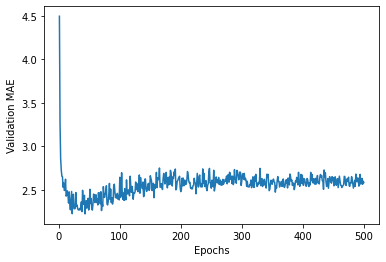

In [70]:
import matplotlib.pyplot as plt

plt.plot(range(1,len(average_mae_history)+1),average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

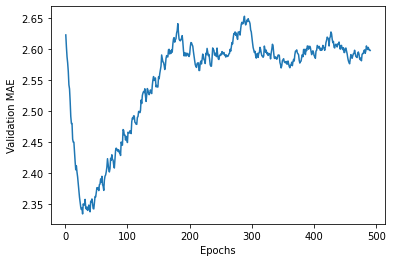

In [71]:
def smooth_curve(points,factor=0.9):
    smoothed_points=[]
    for point in points:
        if smoothed_points:
            previous=smoothed_points[-1]
            smoothed_points.append(previous*factor+point*(1-factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history=smooth_curve(average_mae_history[10:])

plt.plot(range(1,len(smooth_mae_history)+1),smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [72]:
# 一个全新的编译好的模型
model=build_model()
# 在所有训练数据上训练模型
history=model.fit(train_data,
          train_targets,
          epochs=80,
          batch_size=16,
          verbose=0)
test_mse_score,test_mae_score=model.evaluate(test_data,test_targets)

4/4 [==============================] - 0s 4ms/step - loss: 15.5146 - mae: 2.6329


In [73]:
test_mae_score

2.6328868865966797